Import MDAnalysis Module (https://www.mdanalysis.org/) and Matplotlib <br/> 
Don't forget to add the permissions: <br/>
sudo jupyter-nbextension enable nglview --py --sys-prefix <br/>
sudo  jupyter-nbextension enable --py widgetsnbextension <br/>

In [1]:
%matplotlib nbagg
%matplotlib inline
import MDAnalysis as mda
import MDAnalysis.analysis.leaflet
import matplotlib
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import nglview as nv

import warnings
warnings.filterwarnings('ignore')

In [2]:
def modulo(x,a,b):
    if x < a:
        x = x + (b-a)
    elif x >= b:
        x = x - (b-a)
    return x

In [3]:
nbl_box = np.sqrt(5000) # number of lipids on one side of the box (float)
size = 400 # width of the membrane in Angstrom
dxy = size/nbl_box

x_ind = np.arange(0,size,dxy)
y_ind = np.arange(0,size,dxy)

nbl = len(x_ind) # number of lipids on one side of the box (int)

In [4]:
Mtot = np.zeros((nbl,nbl))

(-19.80266322264873,
 415.7824606871153,
 -19.804645858265754,
 415.78444332273233)

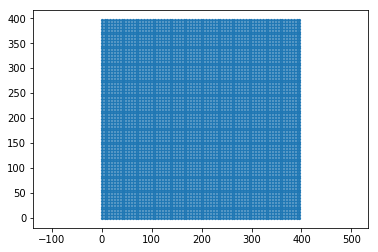

In [5]:
x_tot = []
y_tot = []
for i in range(nbl):
    for j in range(nbl):
        x_tot.append(x_ind[i])
        y_tot.append(y_ind[j])


x_tot = np.array(x_tot)
y_tot = np.array(y_tot)

pts = 5
plt.scatter(x_tot,y_tot, s=pts)
plt.axis('equal')

In [50]:
x_center = size/2
y_center = size/2

a = 50
b = 100

el1 = ( ((x_tot-x_center)/a)**2 + ((y_tot-y_center)/b)**2 < 1 )
el2 = ( ((x_tot-x_center)/b)**2 + ((y_tot-y_center)/a)**2 < 1 )

dom = el1+el2

ind = dom.nonzero()[0]
print(dom.shape)
print(ind)
x_Lo = x_tot[ind]
y_Lo = y_tot[ind]


(5041,)
[1312 1313 1314 1315 1382 1383 1384 1385 1386 1387 1451 1452 1453 1454
 1455 1456 1457 1458 1459 1522 1523 1524 1525 1526 1527 1528 1529 1530
 1531 1592 1593 1594 1595 1596 1597 1598 1599 1600 1601 1602 1603 1663
 1664 1665 1666 1667 1668 1669 1670 1671 1672 1673 1674 1733 1734 1735
 1736 1737 1738 1739 1740 1741 1742 1743 1744 1745 1746 1804 1805 1806
 1807 1808 1809 1810 1811 1812 1813 1814 1815 1816 1817 1874 1875 1876
 1877 1878 1879 1880 1881 1882 1883 1884 1885 1886 1887 1888 1945 1946
 1947 1948 1949 1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960
 2014 2015 2016 2017 2018 2019 2020 2021 2022 2023 2024 2025 2026 2027
 2028 2029 2030 2031 2032 2033 2083 2084 2085 2086 2087 2088 2089 2090
 2091 2092 2093 2094 2095 2096 2097 2098 2099 2100 2101 2102 2103 2104
 2105 2106 2152 2153 2154 2155 2156 2157 2158 2159 2160 2161 2162 2163
 2164 2165 2166 2167 2168 2169 2170 2171 2172 2173 2174 2175 2176 2177
 2178 2179 2221 2222 2223 2224 2225 2226 2227 2228 2229 2230 2231 223

In [29]:
x_center = size/2
y_center = size/2

a = 100
b = 100

el1 = ( ((x_tot-x_center)/a)**2 + ((y_tot-y_center)/b)**2 < 1 )
el2 = ( ((x_tot-x_center)/a)**2 + ((y_tot-y_center)/b)**2 < 1 )

dom = el1+el2

ind = dom.nonzero()[0]
print(dom.shape)
print(ind)
x_Lo = x_tot[ind]
y_Lo = y_tot[ind]


(5041,)
[1310 1311 1312 1313 1314 1315 1316 1378 1379 1380 1381 1382 1383 1384
 1385 1386 1387 1388 1389 1390 1391 1447 1448 1449 1450 1451 1452 1453
 1454 1455 1456 1457 1458 1459 1460 1461 1462 1463 1464 1517 1518 1519
 1520 1521 1522 1523 1524 1525 1526 1527 1528 1529 1530 1531 1532 1533
 1534 1535 1536 1586 1587 1588 1589 1590 1591 1592 1593 1594 1595 1596
 1597 1598 1599 1600 1601 1602 1603 1604 1605 1606 1607 1608 1656 1657
 1658 1659 1660 1661 1662 1663 1664 1665 1666 1667 1668 1669 1670 1671
 1672 1673 1674 1675 1676 1677 1678 1679 1680 1726 1727 1728 1729 1730
 1731 1732 1733 1734 1735 1736 1737 1738 1739 1740 1741 1742 1743 1744
 1745 1746 1747 1748 1749 1750 1751 1752 1797 1798 1799 1800 1801 1802
 1803 1804 1805 1806 1807 1808 1809 1810 1811 1812 1813 1814 1815 1816
 1817 1818 1819 1820 1821 1822 1823 1824 1867 1868 1869 1870 1871 1872
 1873 1874 1875 1876 1877 1878 1879 1880 1881 1882 1883 1884 1885 1886
 1887 1888 1889 1890 1891 1892 1893 1894 1895 1896 1937 1938 1939 194

(-19.80266322264873,
 415.7824606871153,
 -19.804645858265754,
 415.78444332273233)

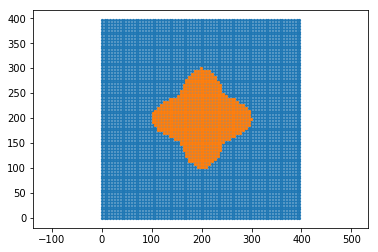

In [51]:
plt.scatter(x_tot, y_tot, s=pts)
plt.scatter(x_Lo, y_Lo, s=pts)
plt.axis('equal')

In [52]:
r_max = 0.9*size/2

nb_r = 10
dr = int(r_max/nb_r)

nb_theta = 12
dtheta = 2*np.pi/nb_theta

print(dr)
print(dtheta)

18
0.5235987755982988


In [53]:
# divide the leaflet into a pie

x = x_tot
y = y_tot

x_pie_r = [[] for r in range(nb_r)]
y_pie_r = [[] for r in range(nb_r)]
pie_r = [[] for r in range(nb_r)]

x_pie_theta = [[] for t in range(nb_theta)]
y_pie_theta = [[] for t in range(nb_theta)]
pie_theta = [[] for t in range(nb_theta)]

r_crown = 0
for r in range(nb_r):

    x_r = []
    y_r = []
    i_r = []
    
    r_crown = r_crown+dr
    
    for i in range(nbl*nbl):
        xi = x_tot[i]
        yi = y_tot[i]

        if (xi-x_center)**2+(yi-y_center)**2 < r_crown**2 and (xi-x_center)**2+(yi-y_center)**2 >= (r_crown-dr)**2:
            x_r.append(xi)
            y_r.append(yi)
            i_r.append(i)
        
    x_pie_r[r] = x_r
    y_pie_r[r] = y_r
    pie_r[r] = i_r
    
for i in range(nbl*nbl):
    xi = x_tot[i]
    yi = y_tot[i]
    
    theta = np.arccos((xi-x_center)/np.sqrt((xi-x_center)**2+(yi-y_center)**2))
    t = int(np.floor(theta/dtheta))
    if yi<y_center : # if angle > pi
        t = nb_theta-t-1
    
    x_pie_theta[t].append(xi)
    y_pie_theta[t].append(yi)
    pie_theta[t].append(i)

(-23.89780138752612, 415.9833561058228, -19.81416647366483, 415.79396393813136)

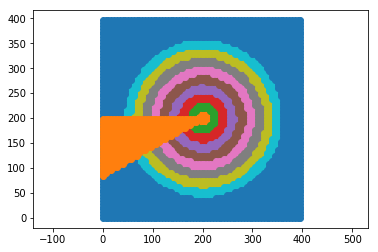

In [54]:
plt.scatter(x,y)

for r in range(nb_r):
    plt.scatter(x_pie_r[r], y_pie_r[r])
    
#for t in range():
    #plt.scatter(x_pie_theta[t], y_pie_theta[t])
t=6;    
plt.scatter(x_pie_theta[t], y_pie_theta[t])    
plt.axis('equal')

In [55]:
# divide the leaflet into a pie - Lo lipids only

x_pie_r_Lo = [[] for r in range(nb_r)]
y_pie_r_Lo = [[] for r in range(nb_r)]
pie_r_Lo = [[] for r in range(nb_r)]

x_pie_theta_Lo = [[] for t in range(nb_theta)]
y_pie_theta_Lo = [[] for t in range(nb_theta)]
pie_theta_Lo = [[] for t in range(nb_theta)]


r_crown = 0
for r in range(nb_r):

    x_r = []
    y_r = []
    i_r = []
    
    r_crown = r_crown+dr
    
    for i in range(len(x_Lo)):
        
        xi = x_Lo[i]
        yi = y_Lo[i]

        if (xi-x_center)**2+(yi-y_center)**2 < r_crown**2 and (xi-x_center)**2+(yi-y_center)**2 >= (r_crown-dr)**2:
            x_r.append(xi)
            y_r.append(yi)
            i_r.append(i)

    x_pie_r_Lo[r] = x_r
    y_pie_r_Lo[r] = y_r
    pie_r_Lo[r] = i_r
    
for i in range(len(x_Lo)):
    xi = x_Lo[i]
    yi = y_Lo[i]

    theta = np.arccos((xi-x_center)/np.sqrt((xi-x_center)**2+(yi-y_center)**2))
    t = int(np.floor(theta/dtheta))
    if yi<y_center : # if angle > pi
        t = nb_theta-t-1

    x_pie_theta_Lo[t].append(xi)
    y_pie_theta_Lo[t].append(yi)
    pie_theta_Lo[t].append(i)

(-19.808846504047704,
 415.7886439685143,
 -19.81416647366483,
 415.79396393813136)

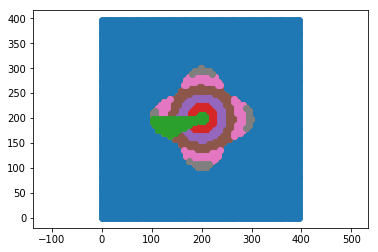

In [56]:
plt.scatter(x,y)
plt.scatter(x_Lo,y_Lo)

for r in range(nb_r):
    plt.scatter(x_pie_r_Lo[r], y_pie_r_Lo[r])
    
#for t in range():
    #plt.scatter(x_pie_theta[t], y_pie_theta[t])
t=6;    
plt.scatter(x_pie_theta_Lo[t], y_pie_theta_Lo[t])    
plt.axis('equal')

In [57]:
pie = [[[] for t in range(nb_theta)] for r in range(nb_r)]

In [58]:
for r in range(nb_r):
        for t in range(nb_theta):
            for l in range(len(pie_r[r])):
                if (pie_r[r][l] in pie_theta[t]):
                    pie[r][t].append(pie_r[r][l])
    

In [59]:
for r in range(nb_r):
    for t in range(nb_theta):
        print('r=%d t=%d %d' % (r,t,len(pie[r][t])) )

r=0 t=0 2
r=0 t=1 4
r=0 t=2 2
r=0 t=3 4
r=0 t=4 2
r=0 t=5 2
r=0 t=6 3
r=0 t=7 2
r=0 t=8 3
r=0 t=9 2
r=0 t=10 2
r=0 t=11 4
r=1 t=0 8
r=1 t=1 6
r=1 t=2 8
r=1 t=3 8
r=1 t=4 7
r=1 t=5 7
r=1 t=6 8
r=1 t=7 9
r=1 t=8 8
r=1 t=9 7
r=1 t=10 7
r=1 t=11 8
r=2 t=0 12
r=2 t=1 15
r=2 t=2 12
r=2 t=3 13
r=2 t=4 14
r=2 t=5 14
r=2 t=6 15
r=2 t=7 12
r=2 t=8 15
r=2 t=9 14
r=2 t=10 14
r=2 t=11 13
r=3 t=0 18
r=3 t=1 18
r=3 t=2 18
r=3 t=3 20
r=3 t=4 17
r=3 t=5 19
r=3 t=6 19
r=3 t=7 20
r=3 t=8 19
r=3 t=9 19
r=3 t=10 17
r=3 t=11 20
r=4 t=0 25
r=4 t=1 24
r=4 t=2 25
r=4 t=3 24
r=4 t=4 26
r=4 t=5 23
r=4 t=6 24
r=4 t=7 22
r=4 t=8 24
r=4 t=9 23
r=4 t=10 26
r=4 t=11 24
r=5 t=0 28
r=5 t=1 28
r=5 t=2 28
r=5 t=3 29
r=5 t=4 27
r=5 t=5 28
r=5 t=6 29
r=5 t=7 29
r=5 t=8 29
r=5 t=9 28
r=5 t=10 27
r=5 t=11 29
r=6 t=0 33
r=6 t=1 35
r=6 t=2 33
r=6 t=3 36
r=6 t=4 36
r=6 t=5 33
r=6 t=6 34
r=6 t=7 34
r=6 t=8 34
r=6 t=9 33
r=6 t=10 36
r=6 t=11 36
r=7 t=0 38
r=7 t=1 40
r=7 t=2 38
r=7 t=3 40
r=7 t=4 39
r=7 t=5 40
r=7 t=6 41
r=7 t=7 4

In [60]:
pie_Lo = [[[] for t in range(nb_theta)] for r in range(nb_r)]

In [61]:
for r in range(nb_r):
        for t in range(nb_theta):
            for l in range(len(pie_r_Lo[r])):
                if (pie_r_Lo[r][l] in pie_theta_Lo[t]):
                    pie_Lo[r][t].append(pie_r_Lo[r][l])
    

In [62]:
for r in range(nb_r):
    for t in range(nb_theta):
        print('r=%d t=%d %d' % (r,t,len(pie_Lo[r][t])) )

r=0 t=0 2
r=0 t=1 4
r=0 t=2 2
r=0 t=3 4
r=0 t=4 2
r=0 t=5 2
r=0 t=6 3
r=0 t=7 2
r=0 t=8 3
r=0 t=9 2
r=0 t=10 2
r=0 t=11 4
r=1 t=0 8
r=1 t=1 6
r=1 t=2 8
r=1 t=3 8
r=1 t=4 7
r=1 t=5 7
r=1 t=6 8
r=1 t=7 9
r=1 t=8 8
r=1 t=9 7
r=1 t=10 7
r=1 t=11 8
r=2 t=0 12
r=2 t=1 15
r=2 t=2 12
r=2 t=3 13
r=2 t=4 14
r=2 t=5 14
r=2 t=6 15
r=2 t=7 12
r=2 t=8 15
r=2 t=9 14
r=2 t=10 14
r=2 t=11 13
r=3 t=0 18
r=3 t=1 15
r=3 t=2 18
r=3 t=3 20
r=3 t=4 15
r=3 t=5 19
r=3 t=6 19
r=3 t=7 15
r=3 t=8 19
r=3 t=9 19
r=3 t=10 15
r=3 t=11 20
r=4 t=0 20
r=4 t=1 0
r=4 t=2 20
r=4 t=3 20
r=4 t=4 1
r=4 t=5 18
r=4 t=6 19
r=4 t=7 0
r=4 t=8 19
r=4 t=9 18
r=4 t=10 1
r=4 t=11 20
r=5 t=0 4
r=5 t=1 0
r=5 t=2 4
r=5 t=3 5
r=5 t=4 0
r=5 t=5 5
r=5 t=6 6
r=5 t=7 0
r=5 t=8 6
r=5 t=9 5
r=5 t=10 0
r=5 t=11 5
r=6 t=0 0
r=6 t=1 0
r=6 t=2 0
r=6 t=3 0
r=6 t=4 0
r=6 t=5 0
r=6 t=6 0
r=6 t=7 0
r=6 t=8 0
r=6 t=9 0
r=6 t=10 0
r=6 t=11 0
r=7 t=0 0
r=7 t=1 0
r=7 t=2 0
r=7 t=3 0
r=7 t=4 0
r=7 t=5 0
r=7 t=6 0
r=7 t=7 0
r=7 t=8 0
r=7 t=9 0
r=7 t=10 0
r=7

In [63]:
threshold = 0.6
M_pie_bin = np.zeros((nb_r, nb_theta))

for r in range(nb_r):
    for t in range(nb_theta):
        if r==0:
            M_pie_bin[r,t]=1
        elif(len(pie_Lo[r][t])/len(pie[r][t])>=threshold):
            M_pie_bin[r,t]=1
print(M_pie_bin)

[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [64]:
boundary = [[],[]]

for t in range(nb_theta):
    print(t)
    boundary[0].append(t)
    
    b_found = 0
    for r in range(0,nb_r-2,1):
        
        if M_pie_bin[r,t]==1 and (M_pie_bin[r+1,t]==0 or r+1>=nb_r) and (M_pie_bin[r+2,t]==0 or r+2>=nb_r):
            b_found = 1
            print('ok')
            boundary[1].append(r)
    print('b_found = %d' % b_found)
    if b_found == 0:
        if M_pie_bin[nb_r-2,t]==1 and M_pie_bin[nb_r-1,t]!=1:
            boundary[1].append(nb_r-2)
        elif M_pie_bin[nb_r-1,t]==1:
            boundary[1].append(nb_r-1)
                
theta_l = np.array(boundary[0])
r_theta = np.array(boundary[1])
print(theta_l)
print(r_theta)

0
ok
b_found = 1
1
ok
b_found = 1
2
ok
b_found = 1
3
ok
b_found = 1
4
ok
b_found = 1
5
ok
b_found = 1
6
ok
b_found = 1
7
ok
b_found = 1
8
ok
b_found = 1
9
ok
b_found = 1
10
ok
b_found = 1
11
ok
b_found = 1
[ 0  1  2  3  4  5  6  7  8  9 10 11]
[4 3 4 4 3 4 4 3 4 4 3 4]


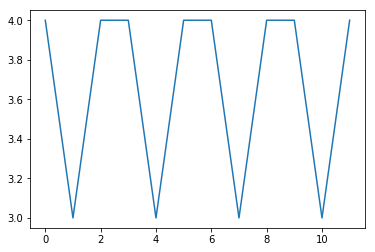

In [65]:
plt.plot(theta_l,r_theta)

In [66]:
r_q = np.fft.rfft(r_theta)
for i in range((len(r_q))):
    print(r_q[i])

(44+0j)
(-6.661338147750939e-16+0j)
-4.440892098500626e-16j
0j
(2.0000000000000018+3.464101615137755j)
(-8.881784197001252e-16-8.881784197001252e-16j)
0j


In [67]:
r_q_pow = abs(r_q)**2
print(r_q_pow)

[1.93600000e+03 4.43734259e-31 1.97215226e-31 0.00000000e+00
 1.60000000e+01 1.57772181e-30 0.00000000e+00]


[0. 1. 2. 3. 4. 5. 6.]


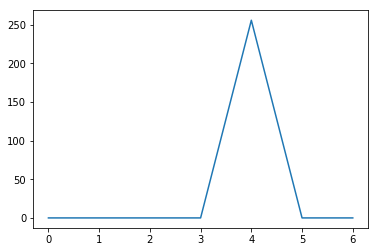

In [69]:
q = np.arange(nb_theta/2+1)
print(q)
plt.plot(r_q_pow*q**2)